In [2]:
import pandas as pd
import numpy as np

In [1]:
import requests
import datetime
import time

In [3]:
def get_commodity_code(long_code):
    # get 'rb' out of 'rb2401'
    # return  'rb'
    com_code = ''
    for char in long_code:
        try:
            int(char)
            break
        except ValueError:
            com_code += char
    return com_code


# -----------------------------------------------------------------------------
def get_full_code(long_code):
    # add '2' to MA301, make it MA2301, for CZCE only
    long_code = str.upper(long_code)
    com_c = get_commodity_code(long_code)
    ym = long_code[len(com_c):]

    if 3 == len(ym):
        full_code = ''.join([com_c, '2',ym])
    else:
        full_code = long_code

    return full_code


# -----------------------------------------------------------------------------
def get_sina_future_data(long_code, market="CF", adjust='0'):
    """
    期货的实时行情数据
    http://vip.stock.finance.sina.com.cn/quotes_service/view/qihuohangqing.html#titlePos_1
    :param symbol: 合约名称的字符串组合
    :type symbol: str
    :param market: CF 为商品期货
    :type market: str
    :param adjust: '1' or '0'; 字符串的 0 或 1
    :type adjust: str
    :return: 期货的实时行情数据
    :return type: list

    return
    [
        '"螺纹钢2401',   # 0 名字+到期年月
        '150000',       # 1 ?
        '3690.000',     # 2 开盘价
        '3717.000',     # 3 最高价
        '3684.000',     # 4 最低价
        '3690.000',     # 5 昨收
        '3690.000',     # 6 买一
        '3691.000',     # 7 卖一
        '3690.000',     # 8 最新价
        '3700.000',     # 9 结算价
        '3684.000',     # 10 昨结算
        '63',           # 11买一挂单量
        '10',           # 12 卖一挂单量
        '1697143.000',  # 13 持仓量
        '1021754',      # 14 成交量
        '沪',           # 15 交易所
        '螺纹钢',        # 16 商品品种
        '2023-09-28',   # 17 日期
        '1',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '3700.991',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0"'
     ]
    """
    full_code = get_full_code(long_code)
    subscribe_list = ','.join(['nf_' + item.strip() for item in full_code.split(',')])
    url = f"https://hq.sinajs.cn/rn={round(time.time() * 1000)}&list={subscribe_list}"
    headers = {
        'Accept': '*/*',
        'Accept-Encoding': 'gzip, deflate',
        'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8',
        'Cache-Control': 'no-cache',
        'Host': 'hq.sinajs.cn',
        'Pragma': 'no-cache',
        'Proxy-Connection': 'keep-alive',
        'Referer': 'http://vip.stock.finance.sina.com.cn/',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'
    }
    r = requests.get(url, headers=headers)

    # fut_data is like ["PVC2310  150132  6008.000  6125.000  6004.000  ...  0  0.000  0  0.000  0"]
    fut_data = [item.strip().split("=")[1].split(",") for item in r.text.split(";") if item.strip() != ""][0]
    return fut_data

In [4]:
get_sina_future_data('rb0')

['"螺纹钢连续',
 '150000',
 '3805.000',
 '3830.000',
 '3791.000',
 '3805.000',
 '3804.000',
 '3805.000',
 '3805.000',
 '3811.000',
 '3783.000',
 '30',
 '418',
 '1639473.000',
 '1429910',
 '沪',
 '螺纹钢',
 '2023-11-06',
 '1',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '3811.625',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0"']

In [2]:
from bs4 import BeautifulSoup
url = "http://finance.sina.com.cn/futures/quotes/CU0.shtml"
response = requests.get(url)
html = response.text

soup = BeautifulSoup(html, "html.parser")

In [6]:
# name = soup.find("h1").text
# price = soup.find("div", class_="hqPrice").text

# (name,price)

In [4]:
data=pd.read_excel('data\SHFE_al2211.xlsx')
data.head()

,datetime,open,high,low,close,volume,open_oi,close_oi,duration
0,2022-10-19 10:51:00,18350,18350,18340,18345,304,139063,139097,60
1,2022-10-19 10:52:00,18345,18355,18340,18340,317,139097,139100,60
2,2022-10-19 10:53:00,18340,18345,18330,18335,253,139100,139135,60
3,2022-10-19 10:54:00,18335,18340,18330,18335,166,139135,139139,60
4,2022-10-19 10:55:00,18335,18340,18335,18335,130,139139,139095,60


In [5]:
data['datetime'].max()

Timestamp('2022-11-15 14:59:00')

In [6]:
data.shape

(8964, 9)

In [7]:
np.ptp(data.close)//100

15

In [8]:
data.open[0]

18350

In [9]:
np.arange(data.open.iloc[0],data.close.iloc[-1],np.ptp(data.close)//100)

array([18350, 18365, 18380, 18395, 18410, 18425, 18440, 18455, 18470,
       18485, 18500, 18515, 18530, 18545, 18560, 18575, 18590, 18605,
       18620, 18635, 18650, 18665, 18680, 18695, 18710, 18725, 18740,
       18755, 18770, 18785, 18800, 18815, 18830, 18845, 18860, 18875,
       18890, 18905], dtype=int64)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

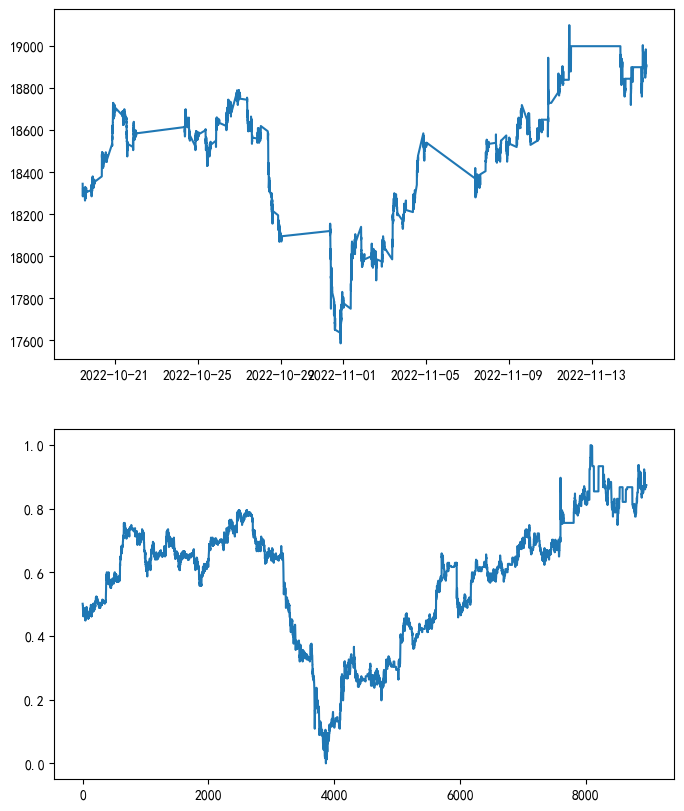

In [11]:
data['norm']=(data.close-data.close.min())/(data.close.max()-data.close.min())
fig,axes=plt.subplots(2,1,figsize=(8,10))
axes[0].plot(data['datetime'],data['close'])
axes[1].plot(data['norm'])

In [12]:
#np.linspace(data.close.min(),data.close.max(),100)
rg=np.arange(data.close.min(),data.close.max(),np.ptp(data.close)//100)
rg

array([17585, 17600, 17615, 17630, 17645, 17660, 17675, 17690, 17705,
       17720, 17735, 17750, 17765, 17780, 17795, 17810, 17825, 17840,
       17855, 17870, 17885, 17900, 17915, 17930, 17945, 17960, 17975,
       17990, 18005, 18020, 18035, 18050, 18065, 18080, 18095, 18110,
       18125, 18140, 18155, 18170, 18185, 18200, 18215, 18230, 18245,
       18260, 18275, 18290, 18305, 18320, 18335, 18350, 18365, 18380,
       18395, 18410, 18425, 18440, 18455, 18470, 18485, 18500, 18515,
       18530, 18545, 18560, 18575, 18590, 18605, 18620, 18635, 18650,
       18665, 18680, 18695, 18710, 18725, 18740, 18755, 18770, 18785,
       18800, 18815, 18830, 18845, 18860, 18875, 18890, 18905, 18920,
       18935, 18950, 18965, 18980, 18995, 19010, 19025, 19040, 19055,
       19070, 19085], dtype=int64)

In [13]:
data['cut_ptp']=pd.cut(data.close,bins=rg,labels=np.arange(rg.shape[0]-1))
data['cut_ptp']

0       50
1       50
2       49
3       49
4       49
        ..
8959    88
8960    88
8961    88
8962    88
8963    88
Name: cut_ptp, Length: 8964, dtype: category
Categories (100, int32): [0 < 1 < 2 < 3 ... 96 < 97 < 98 < 99]

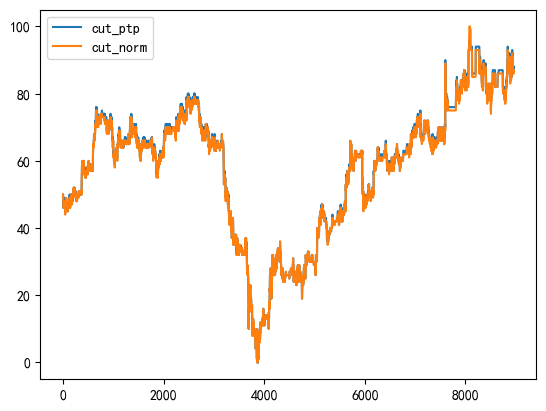

In [14]:
data['cut_norm']=(100*data['norm']).astype(int)

plt.plot(data['cut_ptp'],label='cut_ptp')
plt.plot(data['cut_norm'],label='cut_norm')
plt.legend()

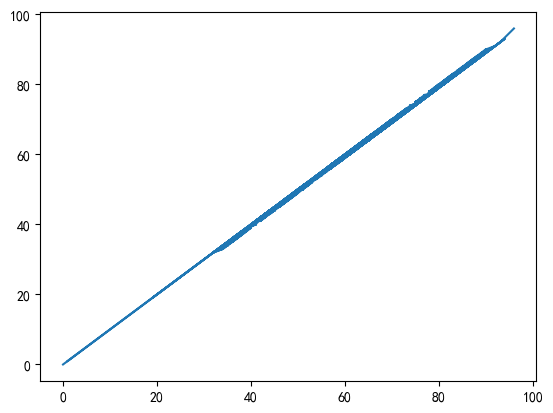

In [15]:
plt.plot(data['cut_ptp'],data['cut_norm'])

In [68]:
data['close'].iloc[-1]-data['open'].iloc[0]

560

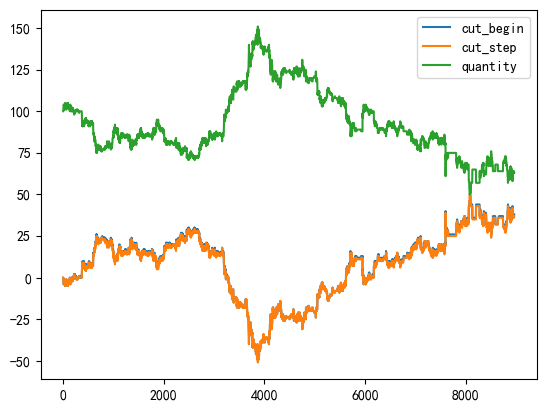

In [16]:
data['cut_begin']=data['cut_ptp'].astype(float)-data['cut_ptp'].iloc[0]
data['diff_begin']=data['close']-data['open'].iloc[0]
data['cut_step']=(data['diff_begin']/(np.ptp(data.close)//100)).astype(int)
data['quantity']=100-data['cut_step']*1
plt.plot(data['cut_begin'],label='cut_begin')
plt.plot(data['cut_step'],label='cut_step')
plt.plot(data['quantity'],label='quantity')
plt.legend()

<Axes: title={'center': '网格实时持仓盈亏点'}>

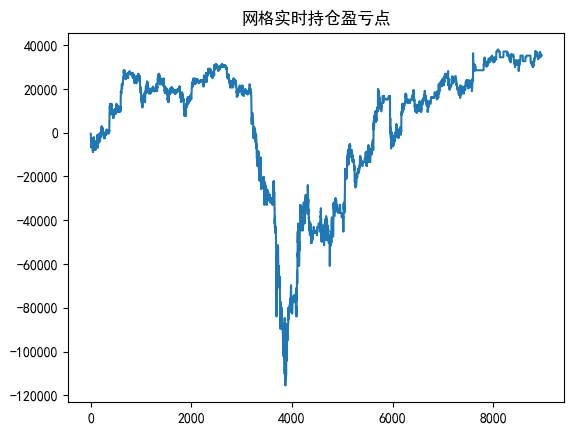

In [17]:
data['持仓盈亏点']=data['diff_begin']*data['quantity']
data['持仓盈亏点'].plot(title='网格实时持仓盈亏点')

In [18]:
data['diff_begin']*data['quantity']

0        -500
1       -1000
2       -1515
3       -1515
4       -1515
        ...  
8959    35280
8960    35280
8961    35280
8962    35280
8963    35280
Length: 8964, dtype: int64

In [19]:
data['cut_step'].min(),data['cut_step'].max()

(-51, 50)

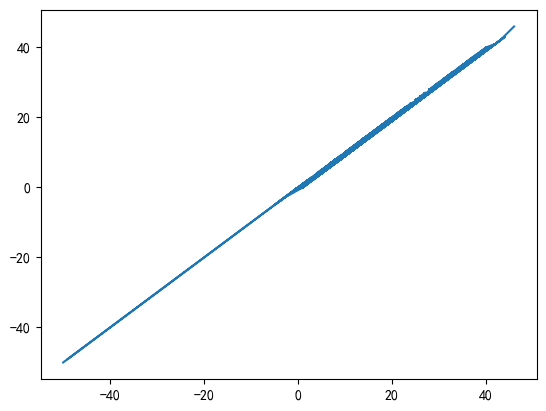

In [20]:
plt.plot(data['cut_begin'],data['cut_step'])

<Axes: >

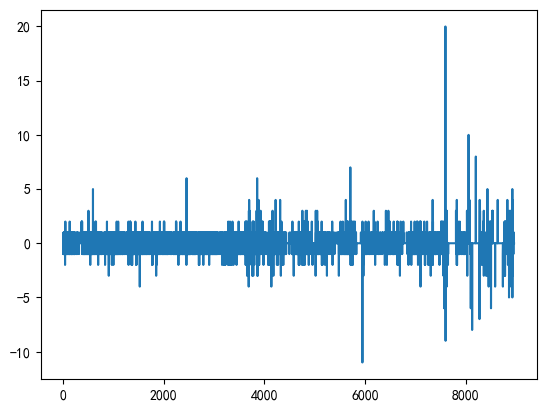

In [21]:
data['cutdiff']=data['cut_step'].diff(1)#-.shift(1)
data['cutdiff'].plot()

<Axes: ylabel='Density'>

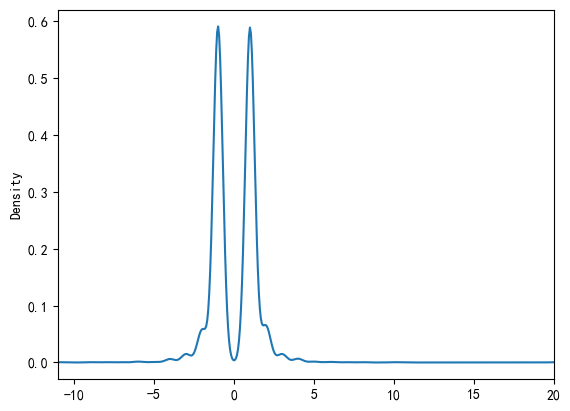

In [22]:
data['cutdiff'].replace(0,np.nan).plot.kde(xlim=[data['cutdiff'].min(),data['cutdiff'].max()])

<Axes: xlabel='cutdiff'>

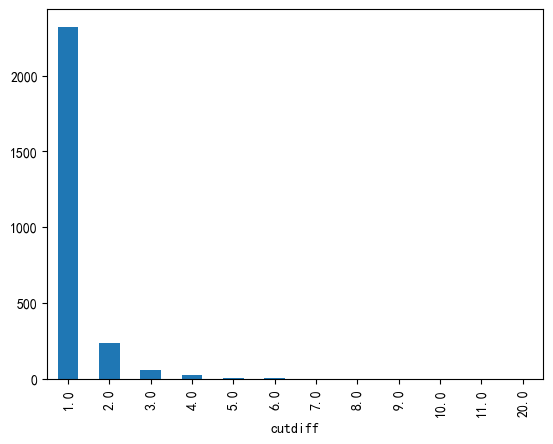

In [23]:
np.abs(data['cutdiff']).value_counts().sort_index()[1:].plot.bar()

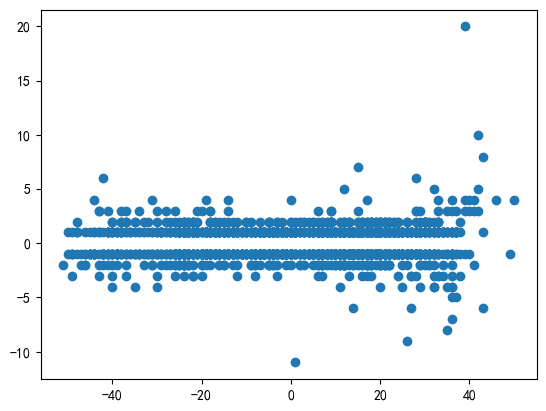

In [24]:
plt.scatter(data['cut_step'],data['cutdiff'].replace(0,np.nan))

In [25]:
data['cutdiff'].sum()

37.0

In [26]:
#交易总次数
data['signdiff']=np.sign(data['cutdiff'])#np.where(data['cutdiff']>0,1,np.where(data['cutdiff']<0,-1,0))
np.abs(data['signdiff']).sum()

2657.0

In [27]:
#交易次数
data.where(data['cutdiff']!=0).dropna()

,datetime,open,high,low,close,volume,open_oi,close_oi,duration,norm,cut_ptp,cut_norm,cut_begin,diff_begin,cut_step,quantity,持仓盈亏点,cutdiff,signdiff
2,2022-10-19 10:53:00,18340.0,18345.0,18330.0,18335.0,253.0,139100.0,139135.0,60.0,0.495050,49,49.0,-1.0,-15.0,-1.0,101.0,-1515.0,-1.0,-1.0
5,2022-10-19 10:56:00,18335.0,18340.0,18320.0,18320.0,578.0,139095.0,138842.0,60.0,0.485149,48,48.0,-2.0,-30.0,-2.0,102.0,-3060.0,-1.0,-1.0
7,2022-10-19 10:58:00,18315.0,18315.0,18300.0,18305.0,722.0,138731.0,138757.0,60.0,0.475248,47,47.0,-3.0,-45.0,-3.0,103.0,-4635.0,-1.0,-1.0
8,2022-10-19 10:59:00,18305.0,18305.0,18290.0,18290.0,948.0,138757.0,138918.0,60.0,0.465347,46,46.0,-4.0,-60.0,-4.0,104.0,-6240.0,-1.0,-1.0
10,2022-10-19 11:01:00,18290.0,18295.0,18275.0,18295.0,933.0,139088.0,138986.0,60.0,0.468647,47,46.0,-3.0,-55.0,-3.0,103.0,-5665.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8936,2022-11-15 14:32:00,18970.0,18970.0,18920.0,18920.0,5.0,3725.0,3725.0,60.0,0.881188,88,88.0,38.0,570.0,38.0,62.0,35340.0,-3.0,-1.0
8937,2022-11-15 14:33:00,18920.0,18920.0,18890.0,18890.0,15.0,3725.0,3720.0,60.0,0.861386,86,86.0,36.0,540.0,36.0,64.0,34560.0,-2.0,-1.0
8946,2022-11-15 14:42:00,18890.0,18910.0,18890.0,18910.0,5.0,3720.0,3715.0,60.0,0.874587,88,87.0,38.0,560.0,37.0,63.0,35280.0,1.0,1.0
8950,2022-11-15 14:46:00,18910.0,18910.0,18900.0,18900.0,5.0,3715.0,3715.0,60.0,0.867987,87,86.0,37.0,550.0,36.0,64.0,35200.0,-1.0,-1.0


In [28]:
#交易总步数
np.abs(data['cutdiff']).sum()

3201.0

In [29]:
#放大倍数
2713/data['cut_step'].iloc[-1]#np.arange(data.open.iloc[0],data.close.iloc[-1],np.ptp(data.close)//100).shape

73.32432432432432

In [30]:
#交易总步长
np.abs(data['cutdiff']).sum()*(np.ptp(data.close)//100)

48015.0

In [31]:
data.close.iloc[-1]-data.open.iloc[0],data['diff_begin'].iloc[-1]

(560, 560)

In [32]:
#放大倍数
65112.0/1385

47.01227436823105

In [33]:
#开次数
(data['cutdiff']<0).sum()

1323

In [34]:
#平次数
(data['cutdiff']>0).sum()

1334

<Axes: title={'center': '历史平仓步数累计'}>

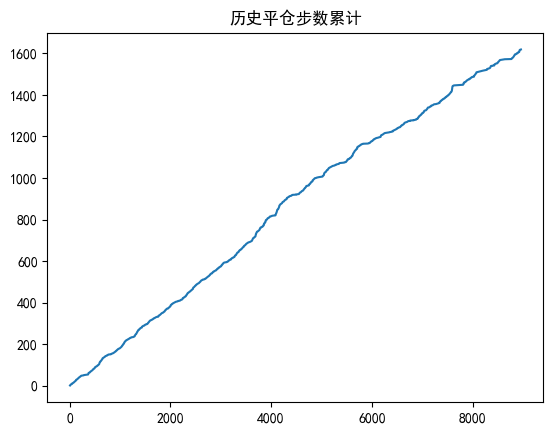

In [35]:
data['平仓收益点']=np.where(data['cutdiff']>0,data['cutdiff']*(np.ptp(data.close)//100)*1,0).cumsum()
data.loc[data['cutdiff']>0,'cutdiff'].cumsum().plot(title='历史平仓步数累计')

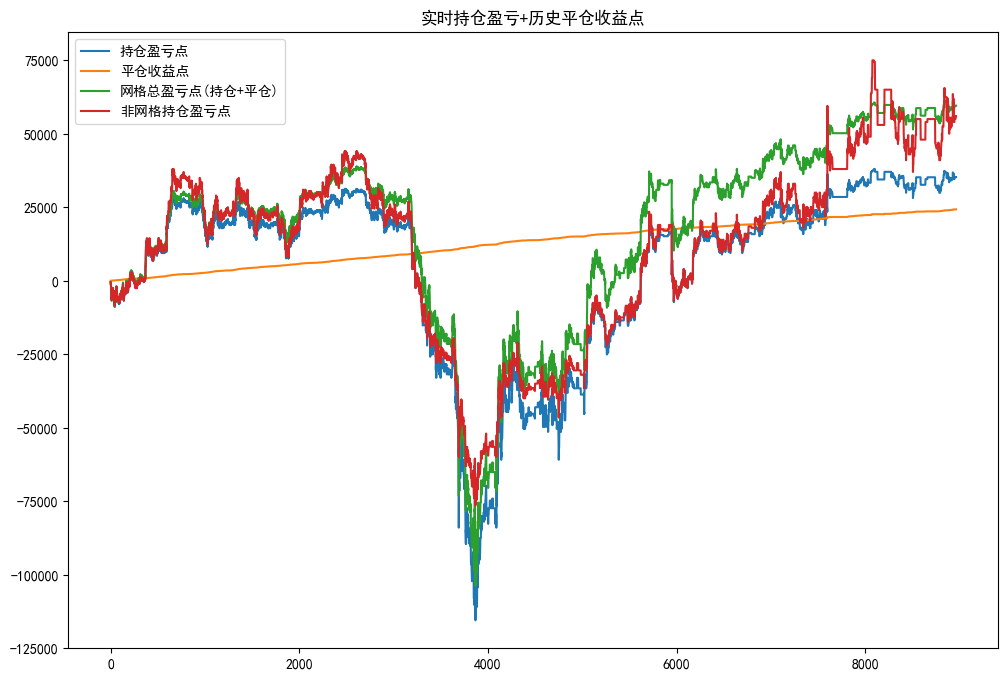

In [36]:
data[['持仓盈亏点','平仓收益点']].plot(title='实时持仓盈亏+历史平仓收益点',figsize=(12,8))
data['总盈亏点']=data['持仓盈亏点']+data['平仓收益点']
data['总盈亏点'].plot(label='网格总盈亏点(持仓+平仓)')
(data['diff_begin']*100).plot(label='非网格持仓盈亏点')
plt.legend()

In [37]:
data[['持仓盈亏点','平仓收益点','总盈亏点']].iloc[-1]

持仓盈亏点    35280.0
平仓收益点    24285.0
总盈亏点     59565.0
Name: 8963, dtype: float64

In [38]:
#网格收益占比
(data['平仓收益点']/data['总盈亏点']).iloc[-1]

0.40770586753966254

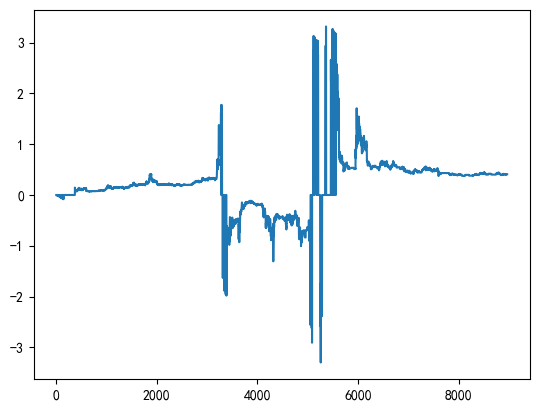

In [39]:
plt.plot(np.where(np.abs(data['总盈亏点'])>100*24*2,data['平仓收益点']/data['总盈亏点'],0))

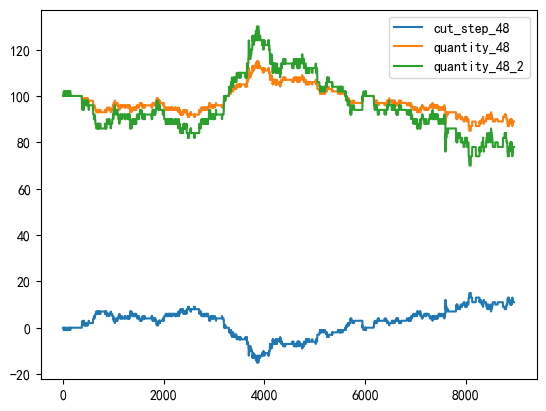

In [40]:
data['cut_step_48']=(data['diff_begin']/48).astype(int)
data['quantity_48']=100-data['cut_step_48']
data['quantity_48_2']=100-data['cut_step_48']*2

plt.plot(data['cut_step_48'],label='cut_step_48')
plt.plot(data['quantity_48'],label='quantity_48')
plt.plot(data['quantity_48_2'],label='quantity_48_2')
plt.legend()

In [41]:
data['cut_step_48'].max()

15

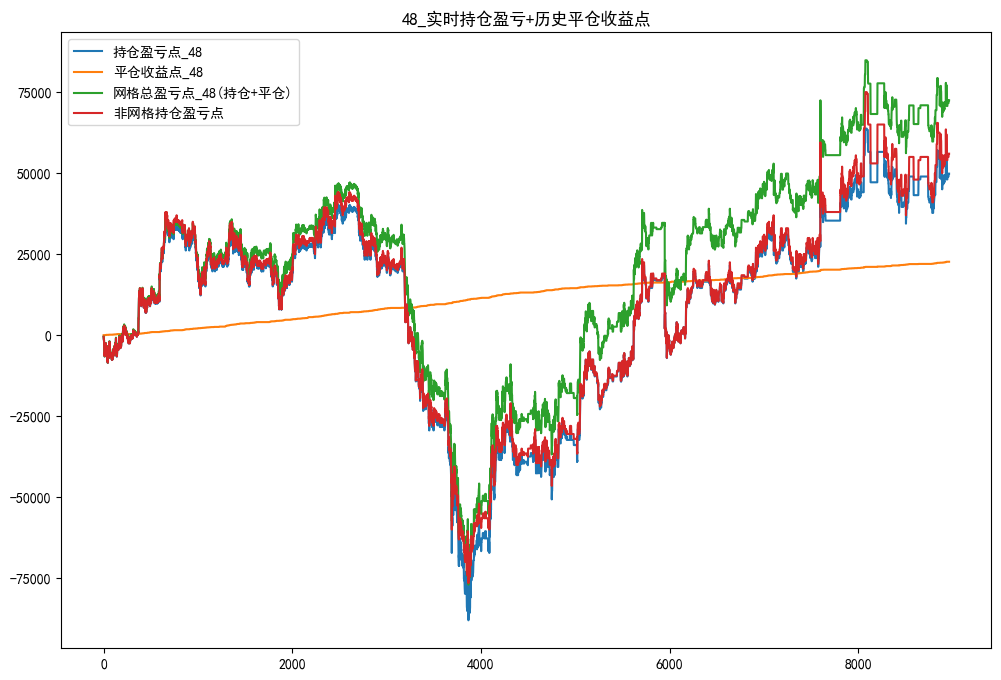

In [42]:
data['cutdiff_48']=data['cut_step_48'].diff(1)
data['持仓盈亏点_48']=data['diff_begin']*data['quantity_48']
data['持仓盈亏点_48_2']=data['diff_begin']*data['quantity_48_2']
data['平仓收益点_48']=np.where(data['cutdiff_48']>0,data['cutdiff_48']*48*1,0).cumsum()
data['平仓收益点_48_2']=np.where(data['cutdiff_48']>0,data['cutdiff_48']*48*2,0).cumsum()

data[['持仓盈亏点_48','平仓收益点_48']].plot(title='48_实时持仓盈亏+历史平仓收益点',figsize=(12,8))
(data['持仓盈亏点_48']+data['平仓收益点_48']).plot(label='网格总盈亏点_48(持仓+平仓)')
(data['diff_begin']*100).plot(label='非网格持仓盈亏点')
plt.legend()

<Axes: title={'center': '48_2实时持仓盈亏+历史平仓收益点'}>

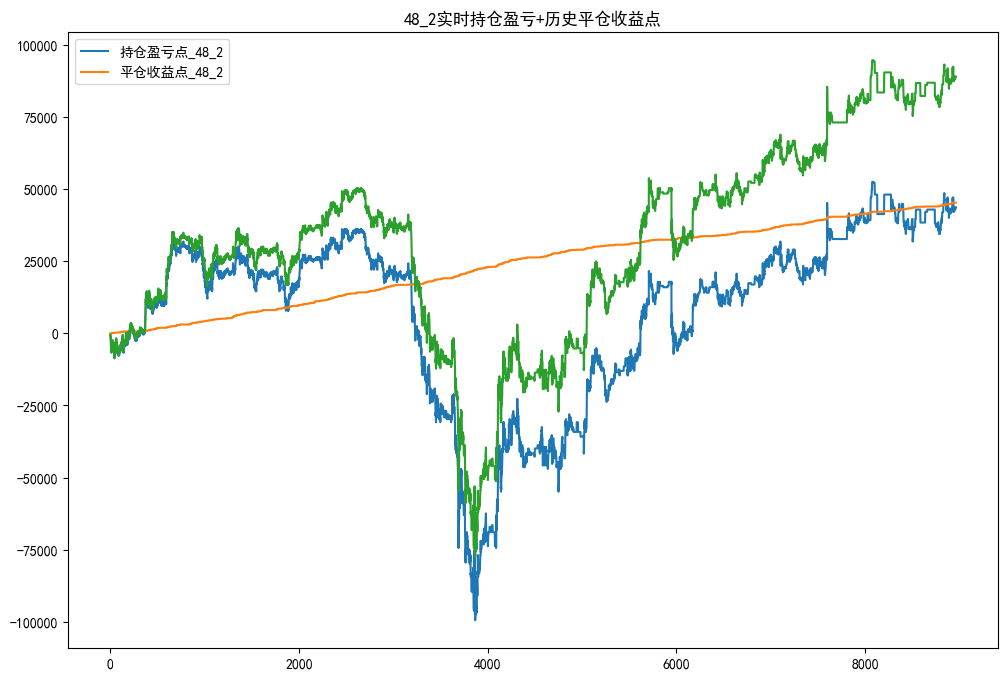

In [43]:
data[['持仓盈亏点_48_2','平仓收益点_48_2']].plot(title='48_2实时持仓盈亏+历史平仓收益点',figsize=(12,8))
(data['持仓盈亏点_48_2']+data['平仓收益点_48_2']).plot(label='网格总盈亏点_48_2(持仓+平仓)')

In [44]:
data[['持仓盈亏点','平仓收益点','持仓盈亏点_48','平仓收益点_48','持仓盈亏点_48_2','平仓收益点_48_2',]].iloc[-1]

持仓盈亏点         35280.0
平仓收益点         24285.0
持仓盈亏点_48      49840.0
平仓收益点_48      22656.0
持仓盈亏点_48_2    43680.0
平仓收益点_48_2    45312.0
Name: 8963, dtype: float64

In [64]:
data[['持仓盈亏点_24','平仓收益点_24','持仓盈亏点_48','平仓收益点_48']].iloc[-1]

持仓盈亏点_24    43120.0
平仓收益点_24    23328.0
持仓盈亏点_48    49840.0
平仓收益点_48    22656.0
Name: 8963, dtype: float64

In [65]:
(data['平仓收益点_24']/(data['持仓盈亏点_24']+data['平仓收益点_24'])).iloc[-1]

0.35107151456778235

In [45]:
#网格收益占比
(data['平仓收益点_48']/(data['持仓盈亏点_48']+data['平仓收益点_48'])).iloc[-1]

0.3125137938644891

In [46]:
(data['平仓收益点_48_2']/(data['持仓盈亏点_48_2']+data['平仓收益点_48_2'])).iloc[-1]

0.5091693635382956

In [47]:
#交易总步数
np.abs(data['cutdiff_48']).sum()

933.0

In [48]:
1322*48

63456

In [49]:
#交易总次数
np.abs(np.sign(data['cutdiff_48'])).sum()

905.0

In [66]:
#交易总次数
np.abs(np.sign(data['cutdiff_24'])).sum()

1743.0

<Axes: xlabel='cutdiff_48'>

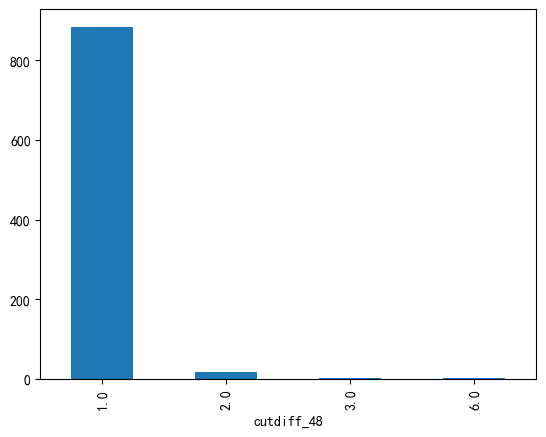

In [50]:
np.abs(data['cutdiff_48']).value_counts().sort_index()[1:].plot.bar()

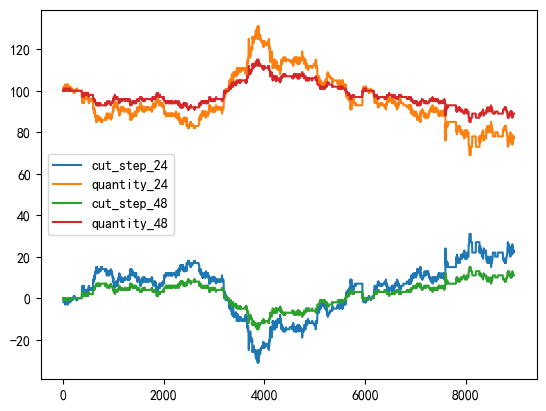

In [51]:
data['cut_step_24']=(data['diff_begin']/24).astype(int)
data['quantity_24']=100-data['cut_step_24']

plt.plot(data['cut_step_24'],label='cut_step_24')
plt.plot(data['quantity_24'],label='quantity_24')
plt.plot(data['cut_step_48'],label='cut_step_48')
plt.plot(data['quantity_48'],label='quantity_48')
plt.legend()

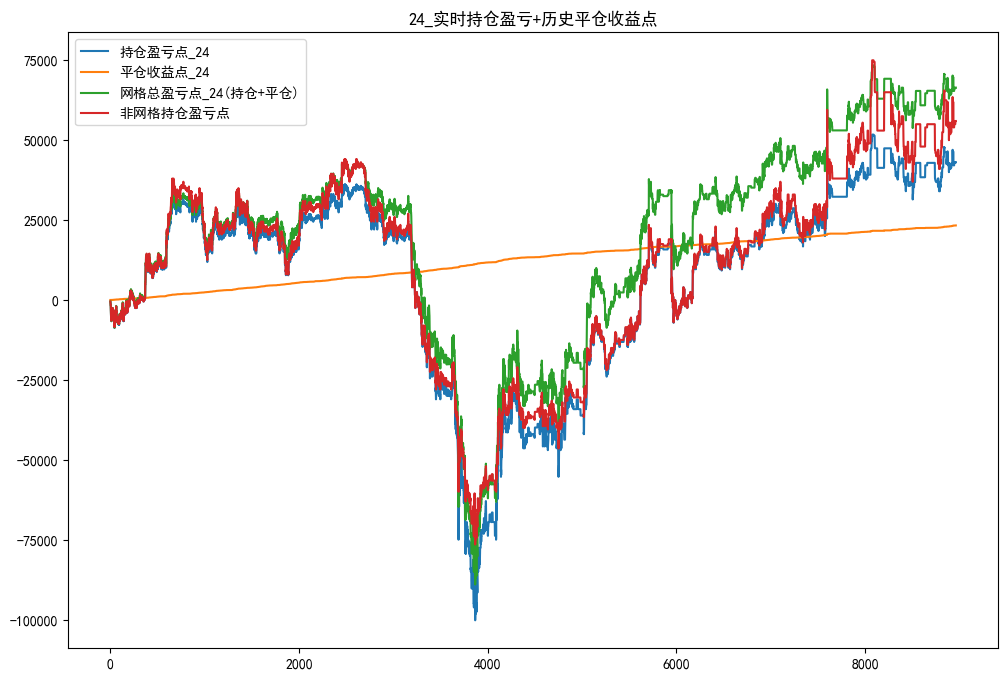

In [52]:
data['cutdiff_24']=data['cut_step_24'].diff(1)
data['持仓盈亏点_24']=data['diff_begin']*data['quantity_24']
data['平仓收益点_24']=np.where(data['cutdiff_24']>0,data['cutdiff_24']*24*1,0).cumsum()

data[['持仓盈亏点_24','平仓收益点_24']].plot(title='24_实时持仓盈亏+历史平仓收益点',figsize=(12,8))
(data['持仓盈亏点_24']+data['平仓收益点_24']).plot(label='网格总盈亏点_24(持仓+平仓)')
(data['diff_begin']*100).plot(label='非网格持仓盈亏点')
plt.legend()

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8964 entries, 0 to 8963
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8964 non-null   datetime64[ns]
 1   open           8964 non-null   int64         
 2   high           8964 non-null   int64         
 3   low            8964 non-null   int64         
 4   close          8964 non-null   int64         
 5   volume         8964 non-null   int64         
 6   open_oi        8964 non-null   int64         
 7   close_oi       8964 non-null   int64         
 8   duration       8964 non-null   int64         
 9   norm           8964 non-null   float64       
 10  cut_ptp        8934 non-null   category      
 11  cut_norm       8964 non-null   int32         
 12  cut_begin      8934 non-null   float64       
 13  diff_begin     8964 non-null   int64         
 14  cut_step       8964 non-null   int32         
 15  quantity       8964 n

<Axes: title={'center': '平仓收益点比较'}>

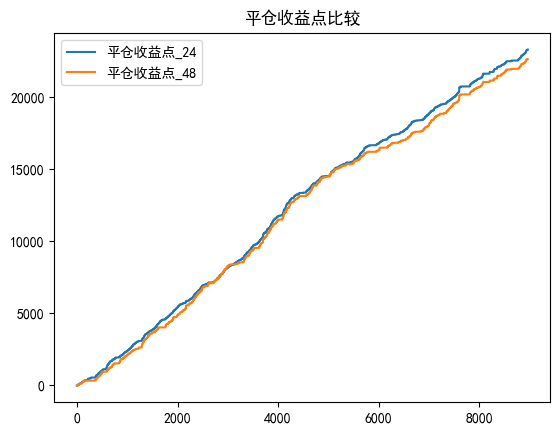

In [54]:
data[['平仓收益点_24','平仓收益点_48']].plot(title='平仓收益点比较')

<Axes: title={'center': '平仓收益点比较'}>

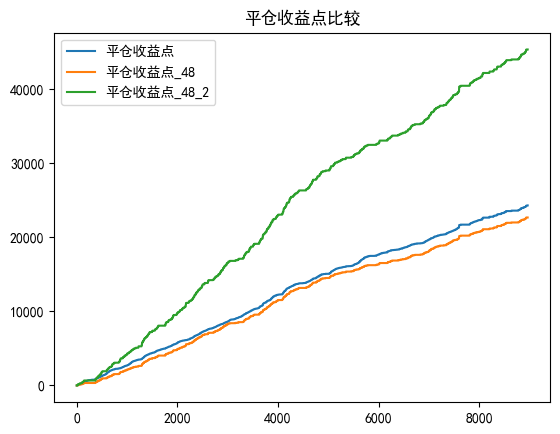

In [55]:
data[['平仓收益点','平仓收益点_48','平仓收益点_48_2']].plot(title='平仓收益点比较')

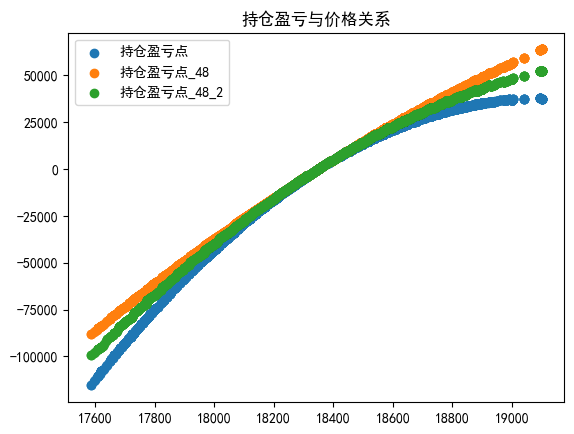

In [56]:
plt.scatter(data['close'],data['持仓盈亏点'],label='持仓盈亏点')
plt.scatter(data['close'],data['持仓盈亏点_48'],label='持仓盈亏点_48')
plt.scatter(data['close'],data['持仓盈亏点_48_2'],label='持仓盈亏点_48_2')
plt.title('持仓盈亏与价格关系')
plt.legend()

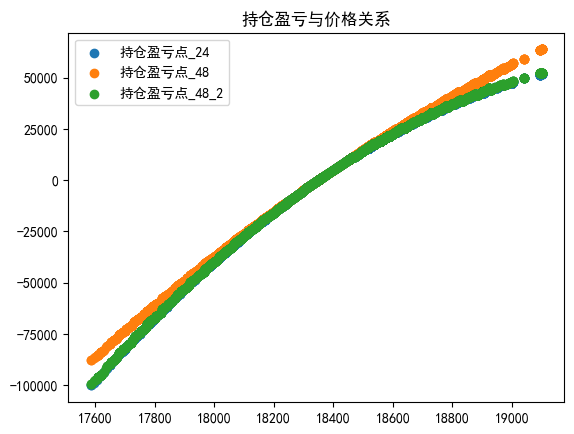

In [57]:
plt.scatter(data['close'],data['持仓盈亏点_24'],label='持仓盈亏点_24')
plt.scatter(data['close'],data['持仓盈亏点_48'],label='持仓盈亏点_48')
plt.scatter(data['close'],data['持仓盈亏点_48_2'],label='持仓盈亏点_48_2')
plt.title('持仓盈亏与价格关系')
plt.legend()

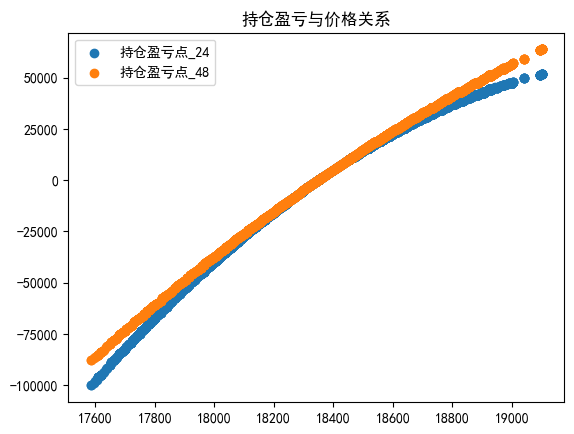

In [58]:
plt.scatter(data['close'],data['持仓盈亏点_24'],label='持仓盈亏点_24')
plt.scatter(data['close'],data['持仓盈亏点_48'],label='持仓盈亏点_48')
#plt.scatter(data['close'],data['持仓盈亏点_48_2'],label='持仓盈亏点_48_2')
plt.title('持仓盈亏与价格关系')
plt.legend()

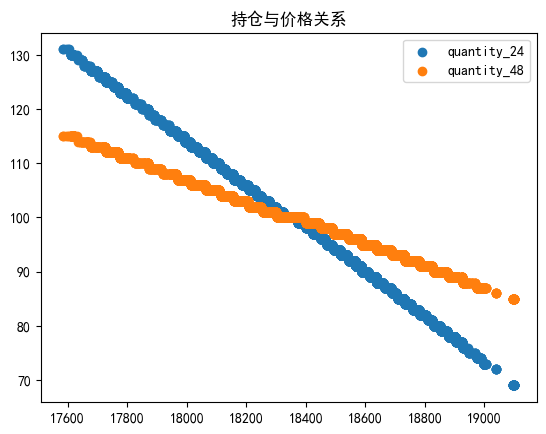

In [59]:
plt.scatter(data['close'],data['quantity_24'],label='quantity_24')
plt.scatter(data['close'],data['quantity_48'],label='quantity_48')
#plt.scatter(data['close'],data['持仓盈亏点_48_2'],label='持仓盈亏点_48_2')
plt.title('持仓与价格关系')
plt.legend()

Text(0.5, 1.0, '切分信号相关性')

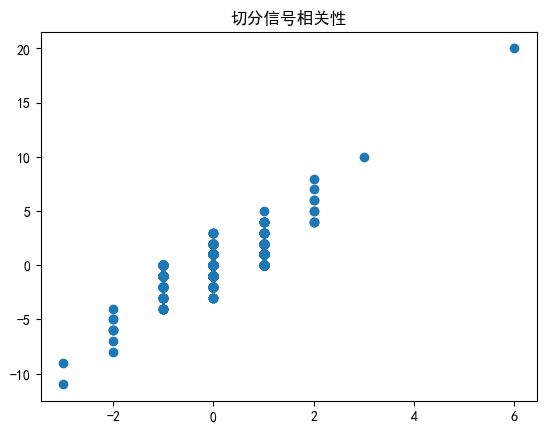

In [60]:
plt.scatter(data['cutdiff_48'],data['cutdiff'])
plt.title('切分信号相关性')

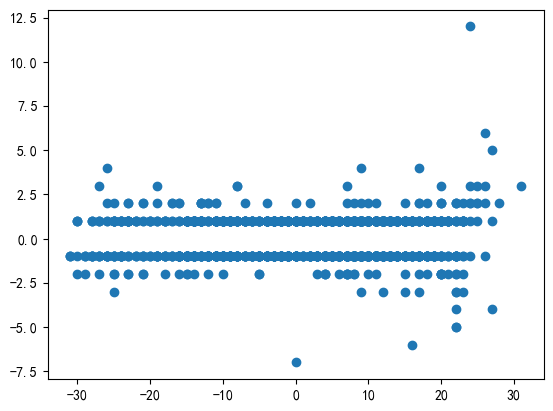

In [69]:
plt.scatter(data['cut_step_24'],data['cutdiff_24'].replace(0,np.nan))

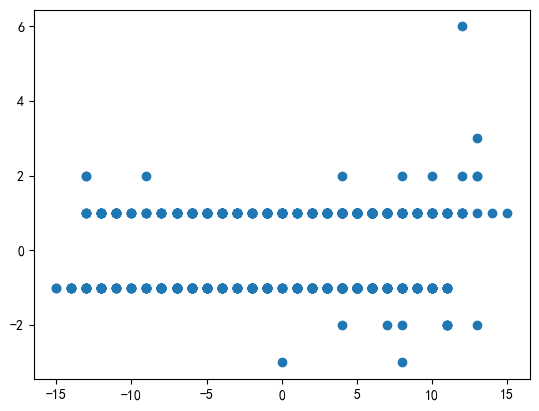

In [61]:
plt.scatter(data['cut_step_48'],data['cutdiff_48'].replace(0,np.nan))

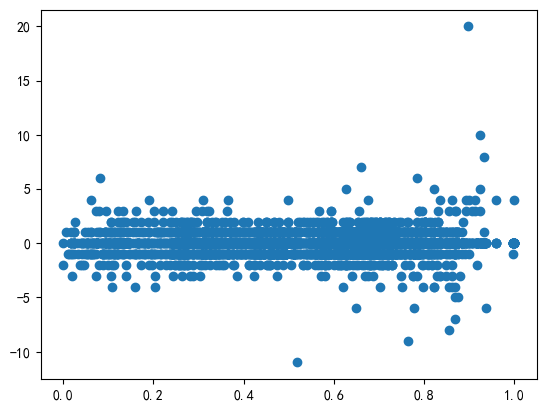

In [62]:
plt.scatter(data['norm'],data['cutdiff'])

In [63]:
data.to_excel('data\SHFE_al2201_sign.xlsx')